## Polynomial Regression

Polynomial regression is a type of regression analysis where the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n$th degree polynomial. It extends linear regression by allowing for nonlinear relationships.

### Mathematical Formulation (Univariate Case)

The polynomial regression model of degree $n$ for a single variable is:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_n x^n + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\beta_0, \beta_1, \ldots, \beta_n$ are the coefficients,
- $\epsilon$ is the error term.

---

### Mathematical Formulation (Multivariate Case)

For multidimensional data with $p$ features, the polynomial regression model includes all polynomial terms up to degree $n$:

$$
y = \beta_0 + \sum_{i=1}^p \beta_i x_i + \sum_{i=1}^p \sum_{j=1}^p \beta_{ij} x_i x_j + \cdots + \text{higher order terms} + \epsilon
$$

where:
- $x_1, x_2, \ldots, x_p$ are the independent variables (features),
- The model includes all combinations of features up to the specified degree,
- $\beta$ terms are the coefficients for each polynomial term,
- $\epsilon$ is the error term.

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

In [6]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)
#y=0.8X^2+0.9X+2 //but we have introduced some noise

In [7]:
X

array([[ 1.60748610e+00],
       [-2.18112870e+00],
       [-2.33455629e+00],
       [ 1.19761830e+00],
       [-1.24553846e+00],
       [-2.72122368e+00],
       [ 1.90557327e+00],
       [-2.28472794e+00],
       [-2.15058004e+00],
       [ 1.38713250e+00],
       [-2.43948480e+00],
       [-1.69174607e+00],
       [-4.05670252e-01],
       [-2.76350459e+00],
       [-4.13823044e-01],
       [-2.37803318e+00],
       [-2.49567125e+00],
       [-3.70023914e-01],
       [ 2.62419739e+00],
       [-2.66671989e+00],
       [-1.69186990e+00],
       [-4.99984424e-01],
       [-2.24060609e+00],
       [-6.31415219e-01],
       [-2.36696174e+00],
       [ 2.42677659e+00],
       [ 1.01657160e+00],
       [ 9.48101615e-01],
       [ 9.29843762e-01],
       [-5.07303848e-02],
       [-5.87269690e-01],
       [-1.66404734e+00],
       [-6.80811348e-01],
       [ 2.44531291e+00],
       [-1.64433877e+00],
       [-1.02927881e+00],
       [-1.45230586e+00],
       [ 2.32677006e+00],
       [ 2.4

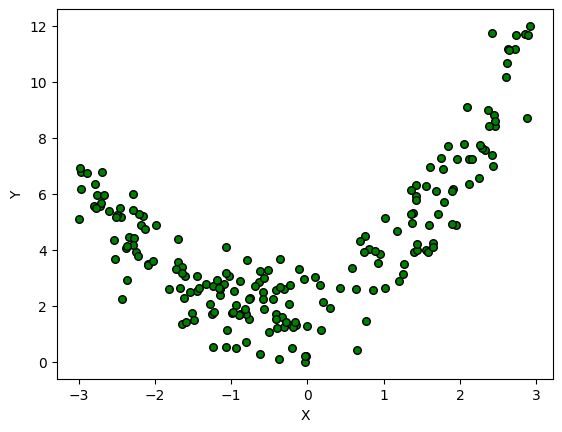

In [8]:
plt.scatter(X,y,edgecolors='black',color='green',s=30)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [10]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test)

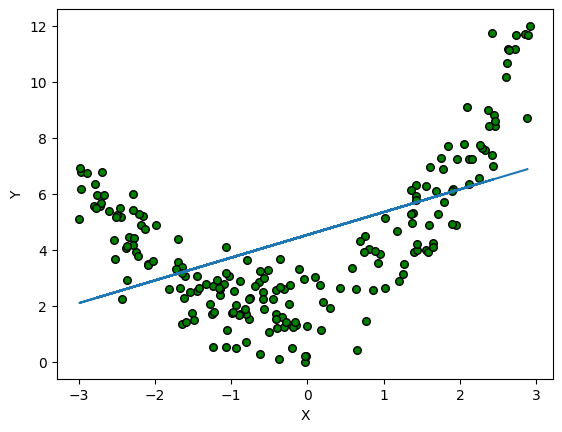

In [12]:
plt.scatter(X,y,edgecolors='black',color='green',s=30)
plt.plot(x_test,y_pred)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [13]:
r2_score(y_test,y_pred)

-0.0535662073737182

In [14]:
def polynomial_fit(x_train,x_test,degree=2):
    poly=PolynomialFeatures(degree=degree,include_bias=True)
    x_train_trans=poly.fit_transform(x_train)
    x_test_trans=poly.transform(x_test)
    return x_train_trans,x_test_trans

In [15]:
x_train_trans,x_test_trans=polynomial_fit(x_train,x_test)

In [16]:
x_train_trans[0]

array([ 1.        , -0.62561381,  0.39139264])

In [17]:
Linear=LinearRegression()
Linear.fit(x_train_trans,y_train)
y_pred=Linear.predict(x_test_trans)

In [18]:
r2_score(y_test,y_pred)

0.7059385831094607

In [19]:
print(Linear.coef_)
print(Linear.intercept_)

[[0.         0.85933133 0.83587611]]
[2.06325691]


In [20]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly,_=polynomial_fit(X_new,X_new)
y_new = Linear.predict(X_new_poly)

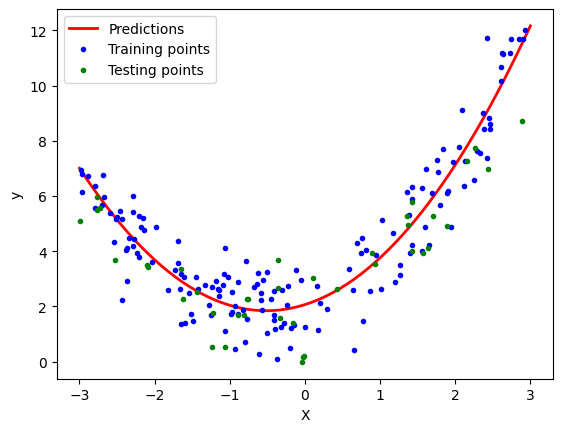

In [21]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [22]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

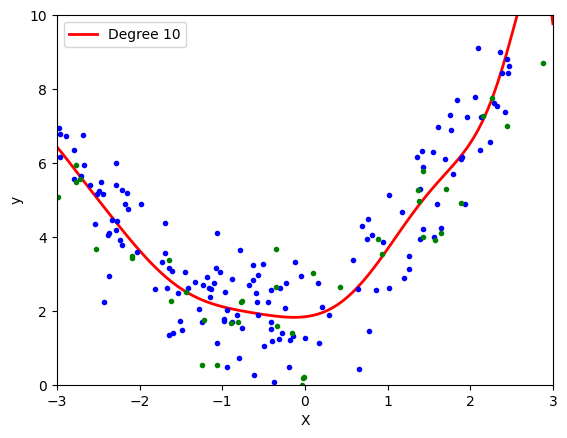

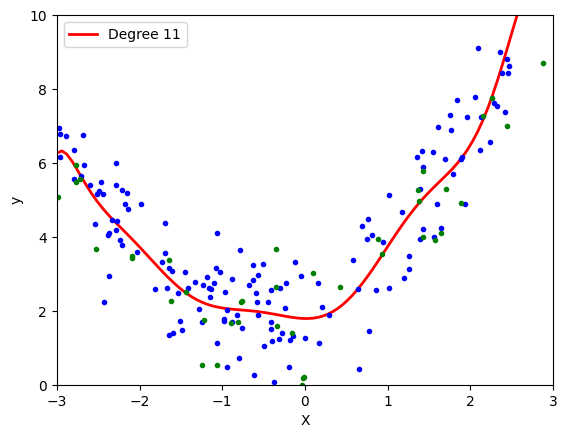

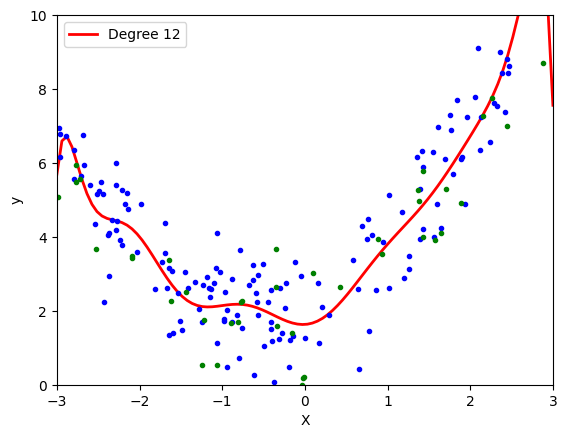

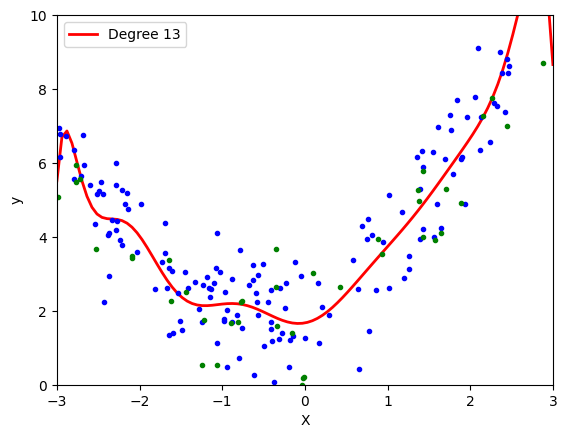

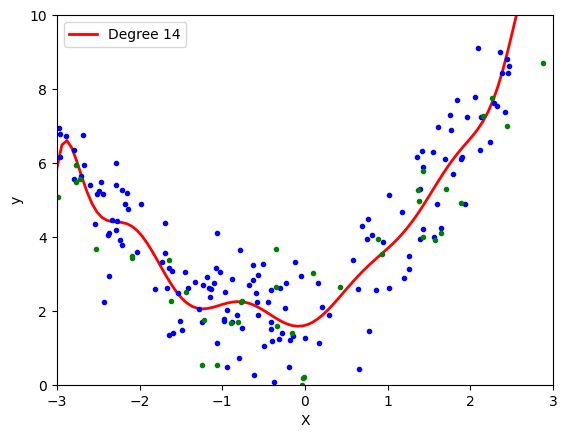

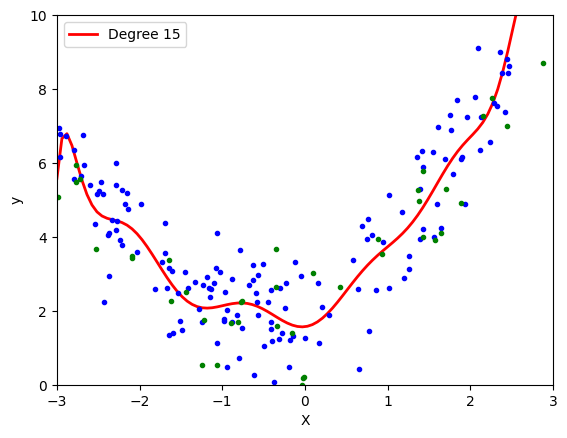

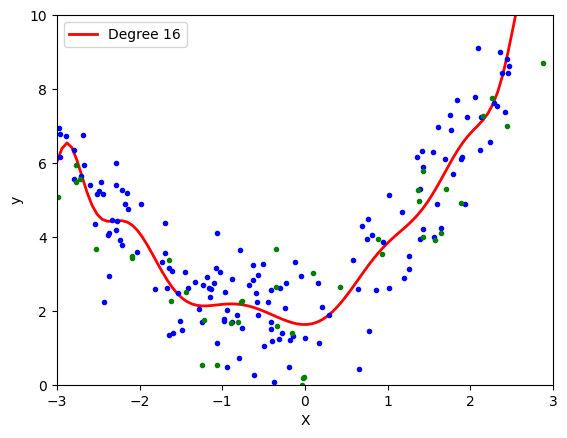

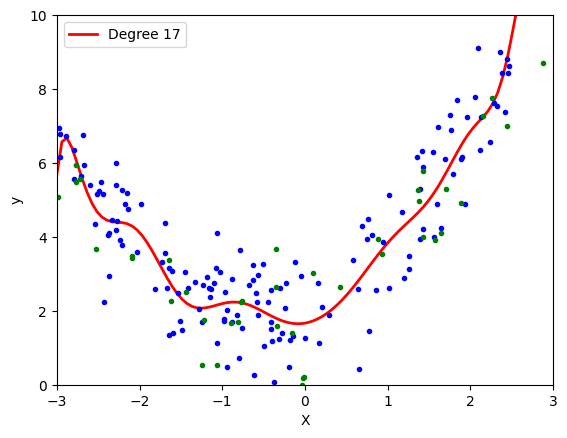

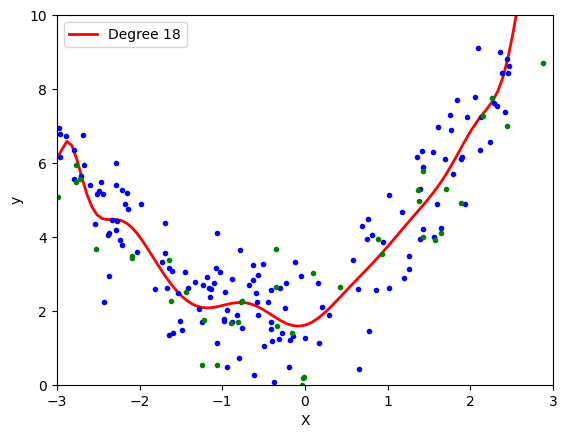

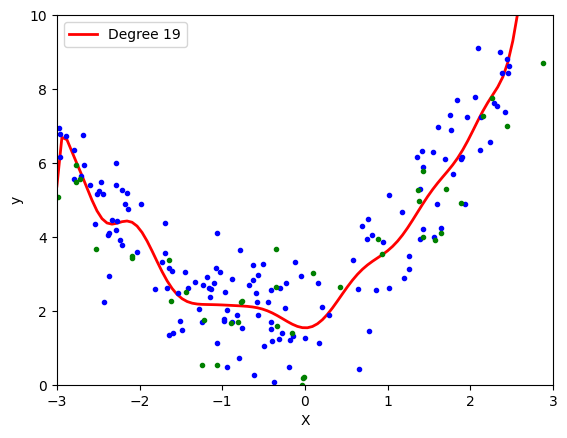

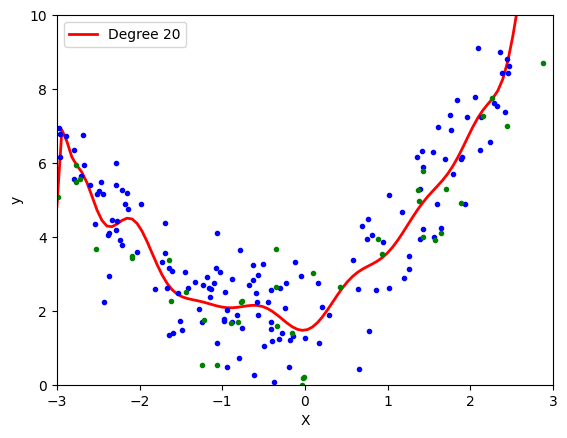

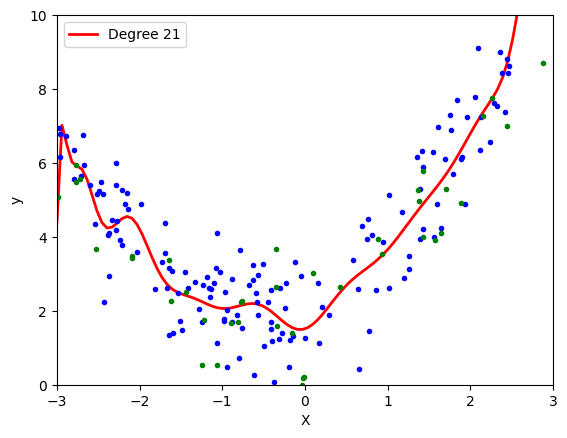

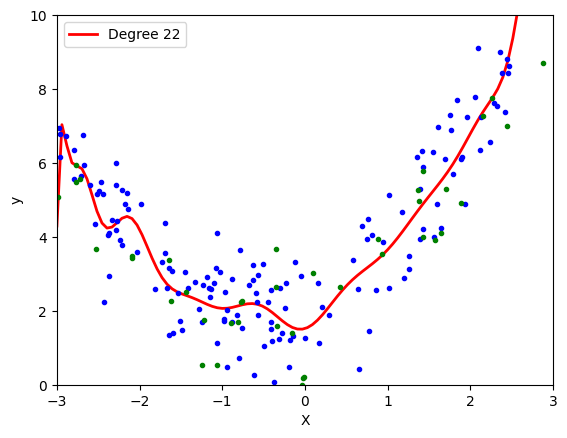

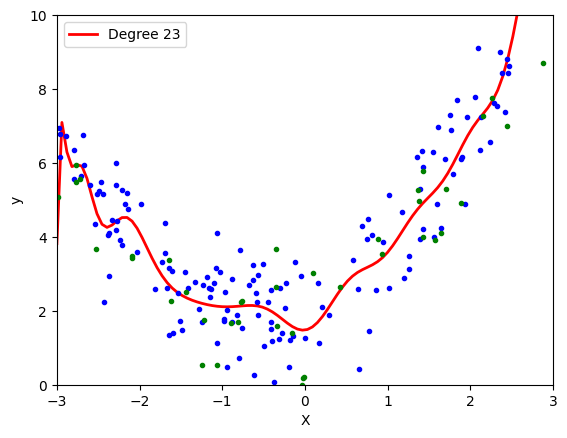

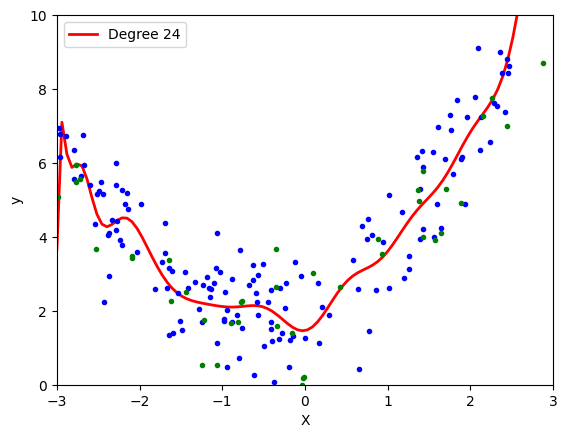

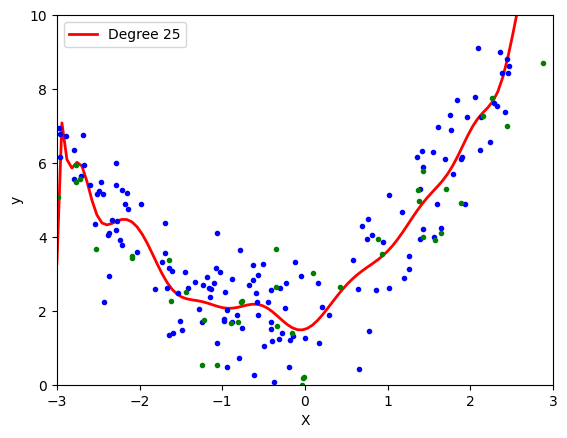

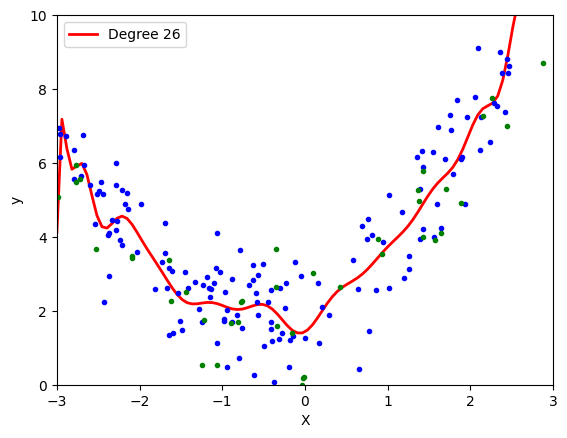

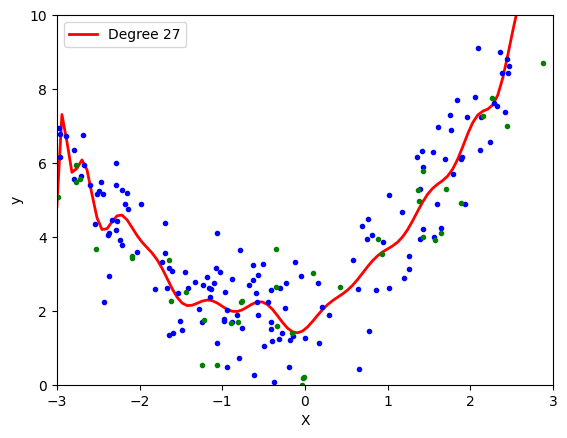

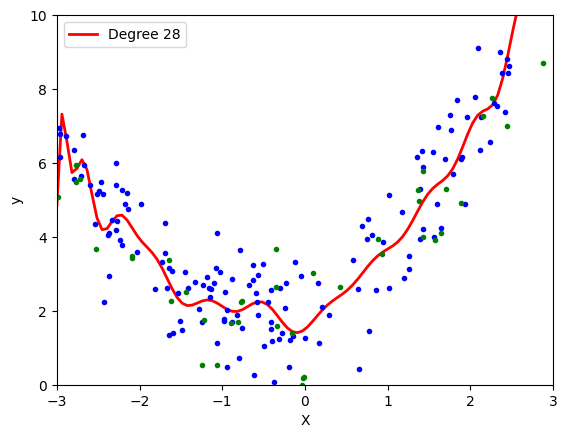

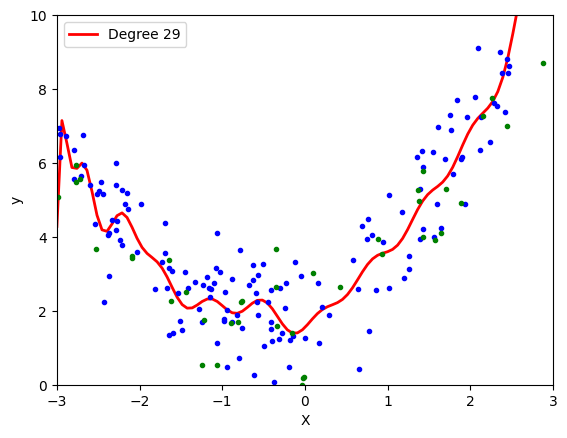

In [23]:
for i in range(10,30):
    polynomial_regression(i)

In [24]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [25]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()


In [26]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [27]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [28]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [29]:
poly = PolynomialFeatures(degree=20)
X_multi_trans = poly.fit_transform(X_multi)

In [30]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 231
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [31]:

X_multi_trans.shape

(100, 231)

In [32]:

lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [33]:

X_test_multi = poly.transform(final)

In [34]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [35]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()